# Analisis basico de resumen de casos corona virus Guatemala 2020

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
dir_resumen = '../data/resumen_todos.csv'
casos = pd.read_csv(dir_resumen, header = 0, parse_dates = True)
dir_comida = '../data/resumen_OllaComunitaria.csv'
ollaComunitaria = pd.read_csv(dir_comida, header = 0, parse_dates = True)

# dar formato a fechas
cols_fecha = ["fecha"]
for col in cols_fecha:
    casos[col] = pd.to_datetime(casos[col], yearfirst = True)
    ollaComunitaria[col] = pd.to_datetime(ollaComunitaria[col], yearfirst = True)

# mostrar columnas y tipo de dato
print(casos.info())
print(ollaComunitaria.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
fecha          120 non-null datetime64[ns]
confirmados    120 non-null int64
recuperados    120 non-null int64
fallecidos     120 non-null int64
activos        120 non-null int64
pruebas        120 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 5.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 7 columns):
fecha                                  45 non-null datetime64[ns]
Xela (TanLechugaYo)                    21 non-null float64
Capital (Rayuela GT)                   3 non-null float64
Antigua (BanderasBlancas)              4 non-null float64
AltaVerapaz (Club Social DVictoria)    2 non-null float64
Santiago_Atitlan                       2 non-null float64
SanTecla_ElSalvador                    18 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.5 KB
None


In [16]:
casos = casos.set_index(keys = 'fecha', drop = True)
ollaComunitaria = ollaComunitaria.set_index(keys = 'fecha', drop = True).fillna(0)

#casos = casos.drop(columns = 'fuente') # ignorar fuente de informacion
# mostrar algunos datos
print(casos.info())
print(ollaComunitaria.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2020-03-13 06:00:00 to 2020-07-10 08:59:00
Data columns (total 5 columns):
confirmados    120 non-null int64
recuperados    120 non-null int64
fallecidos     120 non-null int64
activos        120 non-null int64
pruebas        120 non-null int64
dtypes: int64(5)
memory usage: 5.6 KB
None
            Xela (TanLechugaYo)  Capital (Rayuela GT)  \
fecha                                                   
2020-05-01                  0.0                   0.0   
2020-05-02                  0.0                   0.0   
2020-05-03                  0.0                   0.0   
2020-05-04                  0.0                   0.0   
2020-05-05                116.0                   0.0   

            Antigua (BanderasBlancas)  AltaVerapaz (Club Social DVictoria)  \
fecha                                                                        
2020-05-01                        0.0                                  0.0   
2020-05-02  

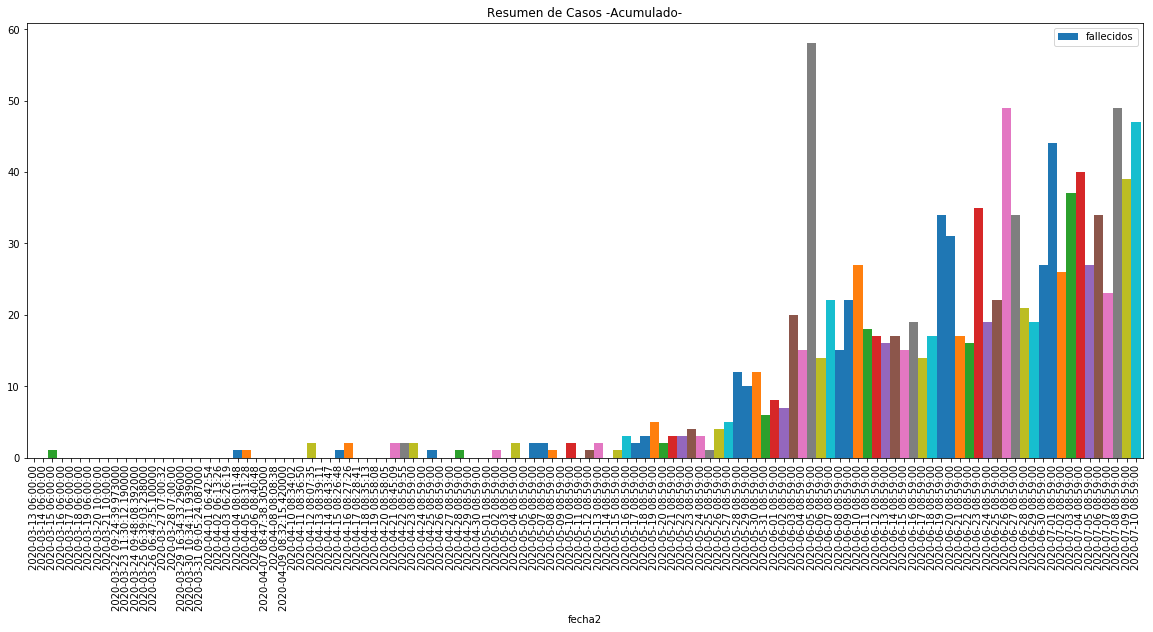

In [17]:
fig1 = plt.figure(figsize=(20,8))
fig1ax1 = fig1.add_subplot(1,1,1)
fig1ax1.set_title('Resumen de Casos -Acumulado-')
reversed_cumsum = casos-casos.shift(1).fillna(0)
reversed_cumsum["fecha2"] = casos.index
reversed_cumsum = reversed_cumsum.set_index(keys = 'fecha2', drop = True)

#print(casos.info())
#print(reversed_cumsum.info())
reversed_cumsum["fallecidos"].plot.bar(ax = fig1ax1 , width = 1)
#casos["fallecidos"].plot(ax = fig1ax1 , marker=".",markersize=20, label="Fallecidos Acumulado")
fig1ax1.legend(loc='best')
#fig1ax1.grid()

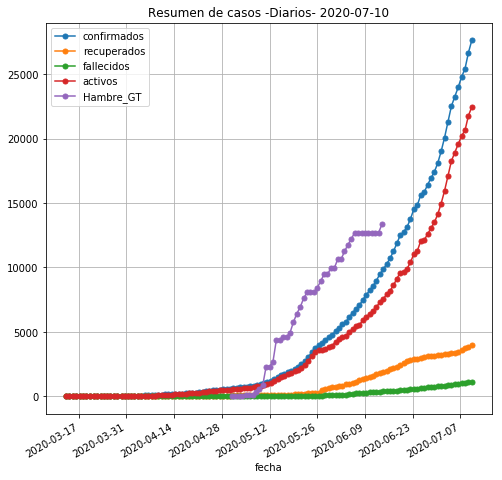

In [18]:
fig2 = plt.figure(figsize=(8,8))
fig2ax1 = fig2.add_subplot(1,1,1)
fig2ax1.set_title('Resumen de casos -Diarios- {}'.format(casos.index.tolist()[-1].strftime('%Y-%m-%d')))
casos[['confirmados','recuperados','fallecidos','activos']].plot( ax = fig2ax1, marker='.',markersize=10)
ollaComunitaria['total_GT'] = ollaComunitaria['Xela (TanLechugaYo)'] \
                              + ollaComunitaria['Capital (Rayuela GT)'] \
                              + ollaComunitaria['Antigua (BanderasBlancas)'] \
                              + ollaComunitaria['AltaVerapaz (Club Social DVictoria)']\
                              + ollaComunitaria['Santiago_Atitlan']
ollaComunitaria['total_SV'] = ollaComunitaria['SanTecla_ElSalvador']
ollaComunitaria['total_GT'].cumsum().plot( ax = fig2ax1, marker='.',markersize=10,label="Hambre_GT")
fig2ax1.legend(loc='best')
fig2ax1.grid()
#fig2.savefig("../imgs/resumen.png".format())


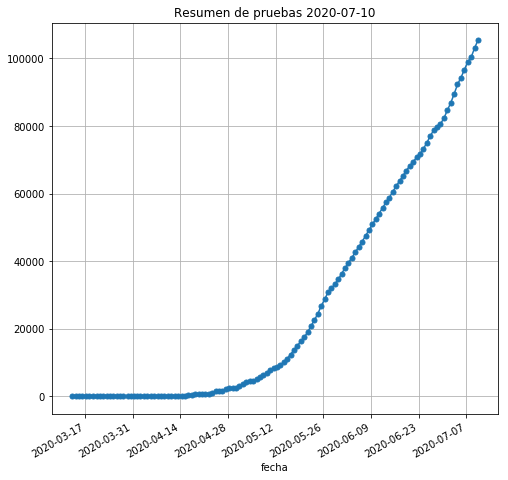

In [19]:
fig3 = plt.figure(figsize=(8,8))
fig3ax1 = fig3.add_subplot(1,1,1)
fig3ax1.set_title('Resumen de pruebas {}'.format(casos.index.tolist()[-1].strftime('%Y-%m-%d')))
casos['pruebas'].plot( ax = fig3ax1, marker='.',markersize=10)
fig3ax1.grid()
#fig3.savefig("../imgs/pruebas.png".format())

In [20]:
print('confirmados: ', max(casos['confirmados']))
print('recuperados: ', max(casos['recuperados']))
print('fallecidos: ', max(casos['fallecidos']))
print('activos: ', max(casos['activos']))
print('pruebas realizadas: ',max(casos['pruebas']))
print('Comida Entregada GT: ', max(ollaComunitaria['total_GT'].cumsum()))
print('Comida Entregada GT: ', max(ollaComunitaria['total_GT'].cumsum()))

confirmados:  27619
recuperados:  4024
fallecidos:  1139
activos:  22454
pruebas realizadas:  105363
Comida Entregada GT:  13347.0
Comida Entregada GT:  13347.0


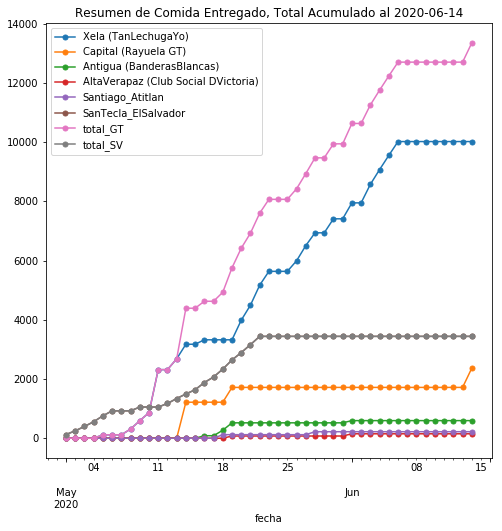

In [21]:
fig3 = plt.figure(figsize=(8,8))
fig3ax1 = fig3.add_subplot(1,1,1)
fig3ax1.set_title('Resumen de Comida Entregado, Total Acumulado al {}'.format(ollaComunitaria.index.tolist()[-1].strftime('%Y-%m-%d')))
ollaComunitaria.cumsum().plot( ax = fig3ax1, marker='.',markersize=10)
#fig3.savefig("../imgs/hambre.png".format())

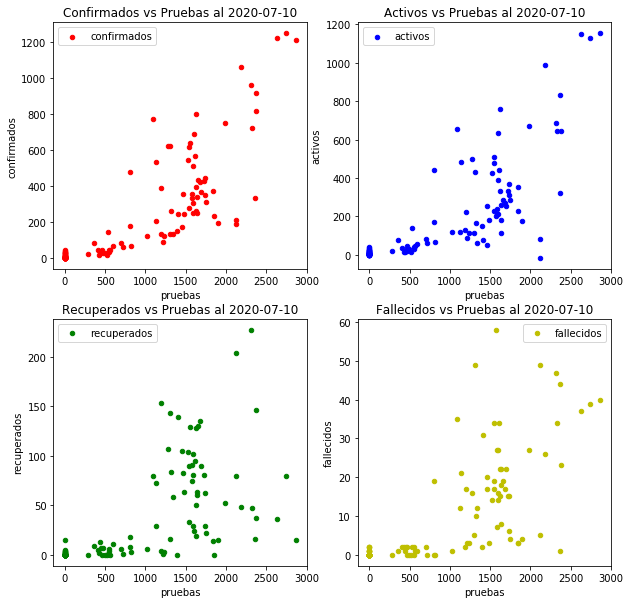

In [22]:
fig4 = plt.figure(figsize=(10,10))
fig4ax1 = fig4.add_subplot(2,2,1)
fig4ax2 = fig4.add_subplot(2,2,2)
fig4ax3 = fig4.add_subplot(2,2,3)
fig4ax4 = fig4.add_subplot(2,2,4)

fig4ax1.set_title('Confirmados vs Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
fig4ax2.set_title('Activos vs Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
fig4ax3.set_title('Recuperados vs Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
fig4ax4.set_title('Fallecidos vs Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))


reversed_cumsum.plot.scatter( x = "pruebas", y = "confirmados", ax = fig4ax1, label = "confirmados", c="r")#, marker='.',markersize=10)
reversed_cumsum.plot.scatter( x = "pruebas", y = "activos", ax = fig4ax2, label = "activos", c = "b")#, marker='.',markersize=10)
reversed_cumsum.plot.scatter( x = "pruebas", y = "recuperados", ax = fig4ax3, label = "recuperados", c= "g")#, marker='.',markersize=10)
reversed_cumsum.plot.scatter( x = "pruebas", y = "fallecidos", ax = fig4ax4, label = "fallecidos", c = "y")#, marker='.',markersize=10)


#fig3.savefig("../imgs/hambre.png".format())

In [23]:
print("Covarianza")
#for column in casos.columns:
#    casos[column] = casos[column] / casos[column].mean()
print(reversed_cumsum.corr())

Covarianza
             confirmados  recuperados  fallecidos   activos   pruebas
confirmados     1.000000     0.574921    0.816772  0.985951  0.826630
recuperados     0.574921     1.000000    0.678011  0.431958  0.646563
fallecidos      0.816772     0.678011    1.000000  0.749404  0.731934
activos         0.985951     0.431958    0.749404  1.000000  0.780351
pruebas         0.826630     0.646563    0.731934  0.780351  1.000000


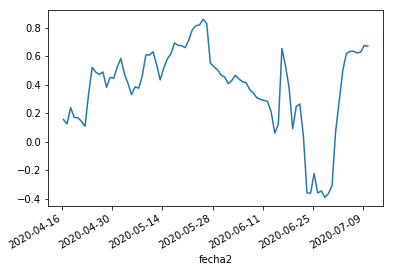

In [24]:

reversed_cumsum["pruebas"].rolling(20).corr(other=reversed_cumsum["activos"]).plot()

In [25]:
reversed_cumsum["pruebas"].count()


120

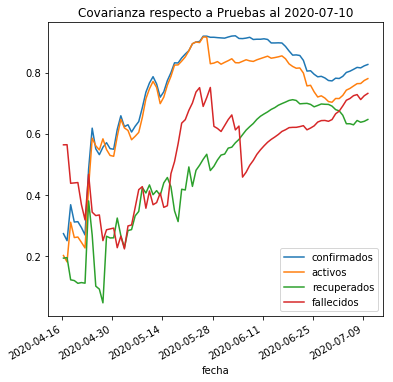

In [26]:
fecha_inicio = reversed_cumsum.index.tolist()[0]
fecha_fin = reversed_cumsum.index.tolist()[-1]
idx = pd.IndexSlice

fig5 = plt.figure(figsize=(6,6))
fig5ax1 = fig5.add_subplot(1,1,1)
#fig5ax2 = fig5.add_subplot(2,2,2)
#fig5ax3 = fig5.add_subplot(2,2,3)
#fig5ax4 = fig5.add_subplot(2,2,4)

fig5ax1.set_title('Covarianza respecto a Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
#fig5ax2.set_title('Activos y Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
#fig5ax3.set_title('Recuperados y Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
#fig5ax4.set_title('Fallecidos y Pruebas al {}'.format(reversed_cumsum.index.tolist()[-1].strftime('%Y-%m-%d')))
#fig5ax1.set_yticks(np.arange(0,1,0.1))

ventana="30d"
a = reversed_cumsum.rolling(ventana).corr().loc[idx[:, 'pruebas'], idx['confirmados']]
b = reversed_cumsum.rolling(ventana).corr().loc[idx[:, 'pruebas'], idx['activos']]
c = reversed_cumsum.rolling(ventana).corr().loc[idx[:, 'pruebas'], idx['recuperados']]
d = reversed_cumsum.rolling(ventana).corr().loc[idx[:, 'pruebas'], idx['fallecidos']]

a.index.names = ["fecha","tipo"]
a.index = a.index.droplevel("tipo")
b.index.names = ["fecha","tipo"]
b.index = b.index.droplevel("tipo")
c.index.names = ["fecha","tipo"]
c.index = c.index.droplevel("tipo")
d.index.names = ["fecha","tipo"]
d.index = d.index.droplevel("tipo")
a.plot(ax=fig5ax1)
b.plot(ax=fig5ax1)
c.plot(ax=fig5ax1)
d.plot(ax=fig5ax1)

#fig5ax1.set_xticks(reversed_cumsum.index.tolist())

fig5ax1.legend(loc="best")
